In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

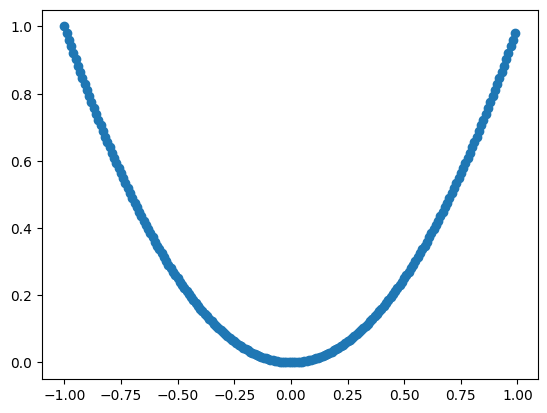

In [21]:
X = np.arange(-1,1,0.01)
y = X**2

X = X.reshape(X.shape[0],1)
y = y.reshape(y.shape[0],1)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()


plt.scatter(X_tensor,y_tensor)

In [22]:
class Fitter(nn.Module):
    def __init__(self):
        super(Fitter,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(1,128),
            nn.Sigmoid(),
            nn.Linear(128,10),
            nn.Sigmoid(),
            nn.Linear(10,1),
        )
        
    def forward(self,x):
        y_pred = self.layer(x)
        return y_pred

model = Fitter()
print(model)

Fitter(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [38]:
epochs = 200
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
running_loss = []

In [39]:
for epoch in range(epochs):
    output = model(X_tensor)
    loss = criterion(output,y_tensor)
    running_loss.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}')
    

Epoch: 0, Loss: 0.0006379777332767844
Epoch: 10, Loss: 0.012446675449609756
Epoch: 20, Loss: 0.003643248463049531
Epoch: 30, Loss: 0.0005124966846778989
Epoch: 40, Loss: 0.0008931131451390684
Epoch: 50, Loss: 0.0005747851682826877
Epoch: 60, Loss: 0.00039526697946712375
Epoch: 70, Loss: 0.0003255173796787858
Epoch: 80, Loss: 0.0003112797858193517
Epoch: 90, Loss: 0.00028278148965910077
Epoch: 100, Loss: 0.0002615678822621703
Epoch: 110, Loss: 0.00024396997469011694
Epoch: 120, Loss: 0.00022809386427979916
Epoch: 130, Loss: 0.00021325763373170048
Epoch: 140, Loss: 0.00019927285029552877
Epoch: 150, Loss: 0.00018606174853630364
Epoch: 160, Loss: 0.0001735304540488869
Epoch: 170, Loss: 0.00016166822751984
Epoch: 180, Loss: 0.00015047781926114112
Epoch: 190, Loss: 0.00013994585606269538


In [40]:
with torch.no_grad():
    output = model(X_tensor)
    loss = criterion(output,y_tensor)

print(f'Final loss: {loss}')

Final loss: 0.00013006314111407846


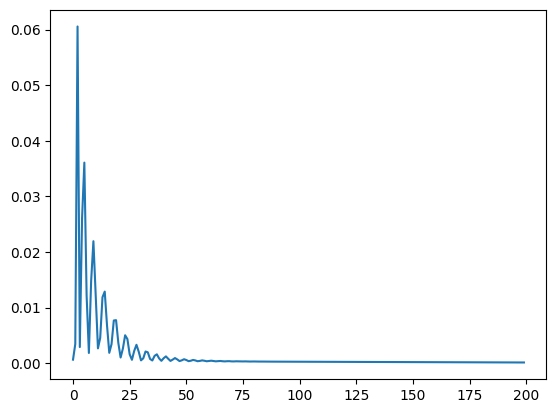

In [41]:
plt.plot([loss.detach().numpy() for loss in running_loss])

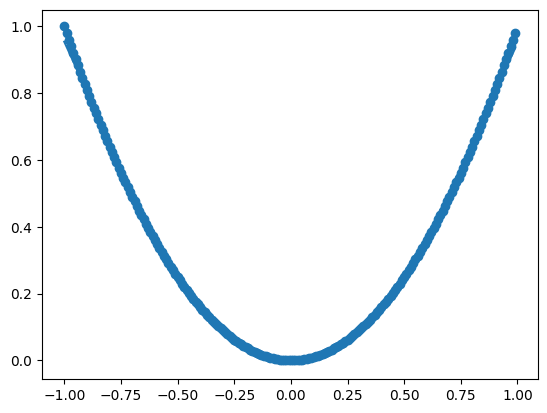

In [42]:
plt.scatter(X_tensor,y_tensor)
plt.plot(X_tensor,output)

In [43]:
model(torch.tensor([0.4]))

tensor([0.1602], grad_fn=<AddBackward0>)

In [49]:
x = torch.randn(5,5)
x

tensor([[-0.2613,  2.5512, -0.5006,  0.9504,  2.5329],
        [ 1.5414,  0.7607,  0.1726,  0.3825, -0.4829],
        [-1.1741,  0.6158,  0.9243, -0.5086, -0.1859],
        [-0.4514,  0.4328,  0.4381, -0.2962, -0.7554],
        [ 0.3185,  1.3429,  0.2364, -0.0312,  1.3753]])

In [69]:
class func(nn.Module):
    def __init__(self):
        super(func,self).__init__()
        self.layer = nn.Sequential(
            nn.MaxPool2d(2)
        )
        
    def forward(self,x):
        y_pred = self.layer(x)
        return y_pred

In [70]:
mod = func()
print(mod)

func(
  (layer): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [73]:
x = torch.randn(1,3,3)
y_pred = mod(x)
y_pred.shape

torch.Size([1, 1, 1])